# 로지스틱 회귀 분석

로지스틱(logistic) 회귀분석은 회귀분석이라는 명칭과 달리 회귀분석 문제와 분류문제에 이용할 수 있다. 로지스틱 회귀분석 모형에서 종속변수가 이항분포를 따르고 그 모수 $\mu$가  독립변수  $x$ 에 의존한다고 가정한다

$p(y \mid x) = \text{Bin} (y; \mu(x), N)$

위 식에서 보듯이 로지스틱 함수는 $ y $의 값이 특정한 구간내의 값$( 0∼N )$만 가질 수 있기 때문에 종속변수가 이러한 특성을 가진 경우에 회귀분석 방법으로 쓸 수 있다.

또는 이항 분포의 특별한 경우$( N=1 )$로 $ y $가 베르누이 확률분포인 경우도 있을 수 있다. 여기에서는 베르누이 확률분포를 따르는 로지스틱 회귀분석만 고려하기로 한다.

$p(y \mid x) = \text{Bern} (y; \mu(x) )$

종속변수  y 가 0또는 1인 분류 예측 문제를 풀 때는  x  값을 이용하여  μ(x) 를 예측한 후 다음 기준에 따라  y^ 값을 출력한다.

$\hat{y} = \begin{cases} 1 & \text{ if } \mu(x) \geq 0.5 \\ 0 & \text{ if } \mu(x) < 0.5 \end{cases}$

회귀분석을 할 때는  y^ 으로  y=1 이 될 확률값  μ(x) 를 직접 사용한다.



$\hat{y} = \mu(x)$

### 시그모이드 함수

로지스틱 회귀모형에서는 베르누이 확률분포의 모수 $ μ$ 가 $ x $의 함수라고 가정한다. $ μ(x)$ 는  x 에 대한 함수를 0부터 1사이의 값만 나올 수 있도록 시그모이드함수(sigmoid function)라는 함수를 사용하여 변형한 것을 사용한다.

로지스틱 회귀모형에서는 베르누이 확률분포의 모수  μ 가  x 의 함수라고 가정한다.  μ(x) 는  x 에 대한 함수를 0부터 1사이의 값만 나올 수 있도록 시그모이드함수(sigmoid function)라는 함수를 사용하여 변형한 것을 사용한다.

시그모이드함수는 종속변수의 모든 실수 값에 대해

유한한 구간  (a,b)  사이의 한정된(bounded) 값을 가지고

$a<f(x)<b$
 
항상 양의 기울기를 가지는 단조증가하는


$a>b→f(a)>f(b)$
 
함수의 집합을 말한다. 실제로는 다음과 같은 함수들이 주로 사용된다.

- 로지스틱(Logistic)함수

$logitstic(z)=σ(z)=11+exp(−z)$
 
- 하이퍼볼릭탄젠트(Hyperbolic tangent)함수

$tanh(z)=sinhzcoshz=(ez−e−z)/2(ez+e−z)/2=2σ(2z)−1$
 

- 오차(Error)함수

$erf(z)=2π−−√∫z0e−t2dt$
 
하이퍼볼릭탄젠트함수는 로지스틱함수를 위아래 방향으로 2배 늘리고 좌우 방향으로 1/2로 축소한 것과 같다.



C:\Users\82109\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 47196 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82109\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 51648 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82109\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 49828 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82109\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 54001 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82109\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 54632 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82109\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from c

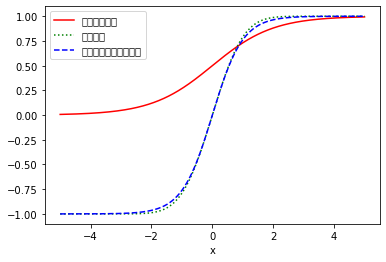

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
import scipy.special
xx = np.linspace(-5, 5, 1000)
plt.plot(xx, 1/(1+np.exp(-xx)), 'r-', label="로지스틱함수")
plt.plot(xx, sp.special.erf(0.5*np.sqrt(np.pi)*xx), 'g:', label="오차함수")
plt.plot(xx, np.tanh(xx), 'b--', label="하이퍼볼릭탄젠트함수")
plt.ylim([-1.1, 1.1])
plt.legend(loc=2)
plt.xlabel("x")
plt.show()

### 로지스틱 함수

로지싁함수는 음의 무한대부터 양의 무한대까지의 실수 값을 0부터 1사이의 실수값으로 1대1 대응시키는 시그모이드함수다. 보통 시그모이드함수라고 하면 로지스틱함수를 가리킨다. 로지스틱함수는 다음 과정을 통해 정의되었다.

베르누이 시도에서 1이 나올 확률은 $ \mu $ 와 0이 나올 확률 $1-\mu$ 의 비율을 승산비(odds ratio)라고 한다.

$\text{odds ratio} = \dfrac{\mu}{1-\mu}$

0부터 1사이의 값만 가지는 $ \mu $를 승산비로 변환하면 0부터 양의 무한대까지의 값을 가질 수 있다.

승산비를 로그 변환한 것이 로지트(Logit function)다.

$z = \text{logit}(\text{odds ratio}) = \log \left(\dfrac{\mu}{1-\mu}\right)$

로지트함수의 값은 로그 변환에 의해 음의 무한대부터 양의 무한대까지의 값을 가질 수 있다.

로지스틱함수(Logistic function)은 로지트함수의 역함수이다. 즉 __음의무한대부터 양의무한대 까지의 값을 가지는 입력변수를 0부터 1사이의 값을 가지는 출력변수로 변환__ 한 것이다.

$\text{logitstic}(z) = \mu(z) = \dfrac{1}{1+\exp{(-z)}}$

#### 선형 판별함수

로지스틱함수 $\sigma(z)$ 를 사용하는 경우에는 $z$값과 $\mu$ 값은 다음과 같은 관계가 있다.

- $z=0$ 일때 $\mu = 0.5$

- $z>0$ 일때 $\mu > 0.5 -> \hat y=1$

- $z<0$ 일때 $\mu < 0.5 -> \hat y=0$

즉 $z$가 분류 모형의 판별함수(decision function)의 역할을 한다. 로지스틱 회귀분석에서는 판별함수 수식으로 선형함수를 사용한다.

$z = w^Tx$

따라서 판별 경계면도 선형이 된다.

####  로지스틱 회귀분석 모형의 모수 추정

로지스틱 회귀분석 모형의 모수 $w$ 는 최대가능도(Maximum Likelihood Estimation, MLE)방법으로 추정할 수 있다.

우선 베르누이분포의 확률밀도함수는 다음과 같다.

$p(y \mid x) = \text{Bern} (y;\mu(x;w) ) = \mu(x;w)^y ( 1 - \mu(x;w) )^{1-y}$

$\mu$ 는 $w^Tx$ 에 로지스틱함수를 적용한 값이다.

$\mu(x;w) = \dfrac{1}{1 + \exp{(-w^Tx)}}$

이 식을 대입하면 조건부 확률은 다음과 같다.

$\begin{eqnarray}
p(y \mid x) 
&=& \left(  \dfrac{1}{1 + \exp{(-w^Tx)}} \right) ^y \left(  1 - \dfrac{1}{1 + \exp{(-w^Tx)}} \right) ^{1-y} \\
&=& \left(  \dfrac{1}{1 + \exp{(-w^Tx)}} \right) ^y \left( \dfrac{\exp{(-w^Tx)}}{1 + \exp{(-w^Tx)}} \right) ^{1-y} \\
\end{eqnarray}$

데이터 표본이 $\{ x_i, y_i \}_{1:N}$ 로 여러개 있는 경우 전체 데이터의 $LL$를 구하면 다음과 같다.

베르누이 확률분포의 정의에서

$\begin{eqnarray}
{LL} 
&=& \log \prod_{i=1}^N \mu(x_i;w)^{y_i} (1-\mu(x_i;w))^{1-y_i} \\
&=& \sum_{i=1}^N \left( y_i \log\mu(x_i;w) +  (1-y_i)\log(1-\mu(x_i;w)) \right) \\
&=& \sum_{i=1}^N \left( y_i \log\left(\dfrac{1}{1 + \exp{(-w^Tx_i)}}\right) + (1-y_i)\log\left(\dfrac{\exp{(-w^Tx_i)}}{1 + \exp{(-w^Tx_i)}}\right) \right) \\
\end{eqnarray}$

가 된다.


로그 가능도를 최대화하는 $w$ 값을 구하기 위해 모수로 미분한다.

$\dfrac{\partial{LL}}{\partial w}  = \sum_{i=1}^N \dfrac{\partial{LL}}{\partial \mu(x_i;w)} \dfrac{\partial\mu(x_i;w)}{\partial w}$

$\mu$ 를 $w$ 로 미분하면

$\dfrac{\partial \mu(x_i;w)}{\partial w} 
= \dfrac{\partial}{\partial w} \dfrac{1}{1 + \exp{(-w^Tx_i)}} \ 
= \dfrac{\exp{(-w^Tx_i)}}{(1 + \exp{(-w^Tx_i)})^2} x_i \ 
= \mu(x_i;w)(1-\mu(x_i;w)) x_i$

두 식을 곱하면 그레디언트 벡터의 수식을 구할 수 있다.

$\begin{eqnarray}
\dfrac{\partial {LL}}{\partial w} 
&=& \sum_{i=1}^N \left( y_i \dfrac{1}{\mu(x_i;w)} - (1-y_i)\dfrac{1}{1-\mu(x_i;w)} \right) \mu(x_i;w)(1-\mu(x_i;w)) x_i   \\
&=& \sum_{i=1}^N \big( y_i (1-\mu(x_i;w)) - (1-y_i)\mu(x_i;w)  \big)  x_i \\
&=& \sum_{i=1}^N \big( y_i  - \mu(x_i;w) \big) x_i \\
\end{eqnarray}$

그레디언트 벡터가 영벡터가 되는 모수의 값이 로그가능도를 최대화하는 값이다. 하지만 그레디언트 벡터 수식이 $w$에 대한 비선형 함수이므로 선형 모형과 같이 간단하게 그레디언트가 0이 되는 모수 $w$ 값에 대한 수식을 구할 수 없으며 수치적인 최적화 방법(numerical optimization)을 통해 반복적으로 최적 모수 $w$의 값을 구해야 한다.

### 수치적 최적화

로그가능도 함수 $LL$ 을 최대화하는 것은 다음 목적함수를 최소화하는 것과 같다.

$J = -LL$

최대경사도(steepest Gradient Descent) 방법을 사용하자.

그레디언트 벡터는 

$g_k = \dfrac{d}{dw}(-LL)$

이고, 이 방향으로 스텝사이즈 $\eta_k 만큼 이동한다.

$\begin{eqnarray}
w_{k+1} 
&=& w_{k} - \eta_k g_k \\
&=& w_{k} + \eta_k \sum_{i=1}^N \big( y_i  - \mu(x_i; w_k) \big) x_i\\
\end{eqnarray}$

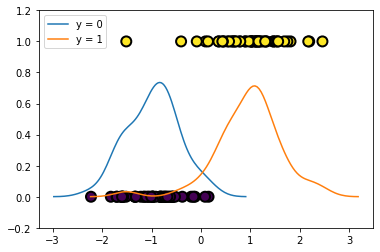

In [2]:
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification

X0, y = make_classification(n_features=1, n_redundant=0, n_informative=1,
                          n_clusters_per_class=1, random_state=4)


plt.scatter(X0, y, c=y, s=100, edgecolor='k', linewidth=2)
sns.distplot(X0[y == 0, :], label='y = 0', hist=False)
sns.distplot(X0[y == 1, :], label='y = 1', hist=False)
plt.ylim(-0.2,1.2)
plt.show()

In [3]:
from statsmodels.api import add_constant
import statsmodels.api as sm
X = sm.add_constant(X0)
logit_mod = sm.Logit(y, X)
logit_res = logit_mod.fit(disp=0)
print(logit_res.summary())

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  100
Model:                          Logit   Df Residuals:                       98
Method:                           MLE   Df Model:                            1
Date:                Wed, 27 May 2020   Pseudo R-squ.:                  0.7679
Time:                        09:49:10   Log-Likelihood:                -16.084
converged:                       True   LL-Null:                       -69.295
Covariance Type:            nonrobust   LLR p-value:                 5.963e-25
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2515      0.477      0.527      0.598      -0.683       1.186
x1             4.2382      0.902      4.699      0.000       2.470       6.006



결과 객체에서 summary 메서드를 사용하여 리포트를 출력할 수 있다. 결과 리포트에서 판별함수의 수식이 다음과 같다는 것을 알 수 있다.

$μ(x)=σ(4.2382x+0.2515)$
 
따라서  z 값의 부호를 나누는 기준값은  −0.2515/4.2382 다.

predict 메서드를 사용하면  μ(x) 값을 출력한다.

유의확률을 감안하면  μ(x) 가 다음과 같다고 볼 수도 있다.

$μ(x)=σ(4.2382x)$
 
이렇게 생각하면  z 값의 부호를 나누는 기준값은 실질적으로는 0이다.

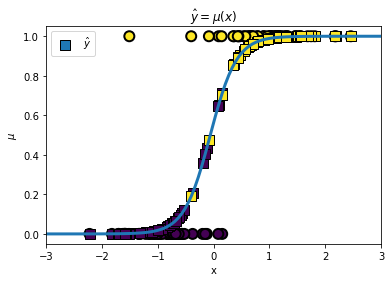

In [4]:
import numpy as np
xx = np.linspace(-3,3,100)

mu = logit_res.predict(sm.add_constant(xx))
plt.plot(xx, mu, lw=3)
plt.scatter(X0, y, c=y, s=100, edgecolor='k', lw=2)
plt.scatter(X0,logit_res.predict(X), label=r'$\hat{y}$', marker='s',c=y,
           s=100,edgecolor='k',lw=1)
plt.xlim(-3,3)
plt.xlabel('x')
plt.ylabel(r'$\mu$')
plt.title(r'$\hat{y}=\mu(x)$')
plt.legend()
plt.show()

#### 판별함수

Logit 모형의 결과 객체에는 fittedvalues 라는 속성으로 판별함수 $z=w^Tx$값이 들어가있다. 이 값을 이용하여 분류문제를 풀 수도 있다.

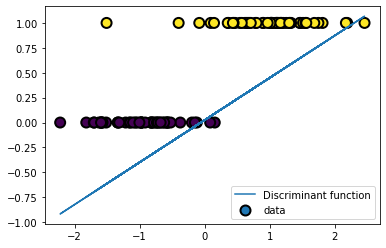

In [5]:
import warnings
 
warnings.filterwarnings("ignore")

plt.scatter(X0,y,c=y,s=100, edgecolor='k',lw=2,label='data')
plt.plot(X0, logit_res.fittedvalues * 0.1, label='Discriminant function')
plt.legend()
plt.show()

#### 로지스틱 회귀 성능 측정

로지스틱 회귀 성능은 맥파든 의사결정계수(McFadden pseudo R square) 값으로 측정한다.

$R^2_{\text{pseudo}} = 1 - \dfrac{G^2}{G^2_0}$

$G^2$ 는 이탈도(deviance)라고 하는 양으로 다음과 같이 정의된다.

$G^2 = 2\sum_{i=1}^N \left( y_i\log\dfrac{y_i}{\hat{y}_i} + (1-y_i)\log\dfrac{1-y_i}{1-\hat{y}_i} \right)$

여기에서 $\hat{y}$는 $y=1$일 확률 $\mu$를 뜻한다.

$\hat{y}_i = \mu(x_i)$

이탈도는 모형이 100% 정확한 경우에는 0이 되고 모형의 성능이 나빠질수록 값이 커진다.
또한 이탈도는 로그 가능도에 음수를 취한값과 같다.

$G^2 = -LL$

$G^2$는 현재 이탈도이고 $G^2_0$은 귀무모형(null model)으로 측정한 이탈도다.

귀무모형이란 모든 x가 y를 예측하는데 전혀 영향을 미치지 않는 모형을 말한다. 즉 무조건부 확률 $p(y)$에 따라 $x$에 상관없이 동일하게 $y$를 예측하는 모형을 말한다. 결국 우리가 만들 수 있는 가장 성능이 나쁜 모형이 된다.

$\mu_{\text{null}} = \dfrac{\text{number of $Y=1$ data}}{\text{number of all data}}$

따라서 맥파든 의사결정계수는 가장 성능이 좋을 때는 1이 되고 가장 성능이 나쁠떄는 0이 된다.

In [6]:
from sklearn.metrics import log_loss

y_hat = logit_res.predict(X)
log_loss(y,y_hat,normalize=False)

16.084355200413036

귀무 모형의 모수값을 구하면 0.51이고 이 값으로 로그 손실을 계산하면 약 69이다.

In [7]:
mu_null = np.sum(y) / len(y)
mu_null

0.51

In [8]:
y_null = np.ones_like(y) * mu_null
log_loss(y,y_null, normalize=False)

69.29471672244784

두 값을 이용하여 맥파든 의사 결정계수 값을 계산하 수 있다.


In [9]:
1 - (log_loss(y,y_hat) / log_loss(y,y_null))

0.7678848264170398

#### Scikit-Learn 패키지의 로지스틱 회귀

Scikit-Learn 패키지는 로지스틱 회귀모형 LogisticRegression 를 제공한다.

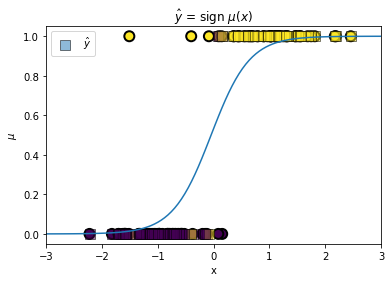

In [10]:
from sklearn.linear_model import LogisticRegression

model_sk = LogisticRegression().fit(X0,y)

xx = np.linspace(-3,3,100)
mu = 1.0/(1 + np.exp(-model_sk.coef_[0][0]*xx - model_sk.intercept_[0]))
plt.plot(xx,mu)
plt.scatter(X0, y, c=y, s=100, edgecolor='k', lw=2)
plt.scatter(X0, model_sk.predict(X0), label=r'$\hat{y}$',marker='s',c=y,
           s=100, edgecolor='k', lw=1, alpha=0.5)
plt.xlim(-3,3)
plt.xlabel('x')
plt.ylabel(r'$\mu$')
plt.title(r'$\hat{y}$ = sign $\mu(x)$')
plt.legend()
plt.show()

In [11]:
from sklearn.datasets import load_iris

iris = load_iris()

idx = np.in1d(iris.target, [0,1])

X0 = iris.data[idx, :1]
X = sm.add_constant(X0)
y = iris.target[idx]

logit_mod = sm.Logit(y, X)
logit_res = logit_mod.fit(disp=0)
print(logit_res.summary())

In [13]:
logit_res.params

-logit_res.params[0]/logit_res.params[1]

y_pred = logit_res.predict(X) >= 0.5

from sklearn.metrics import confusion_matrix

confusion_matrix(y, y_pred)

from sklearn.metrics import classification_report

print(classification_report(y, y_pred))

array([-27.83145099,   5.14033614])

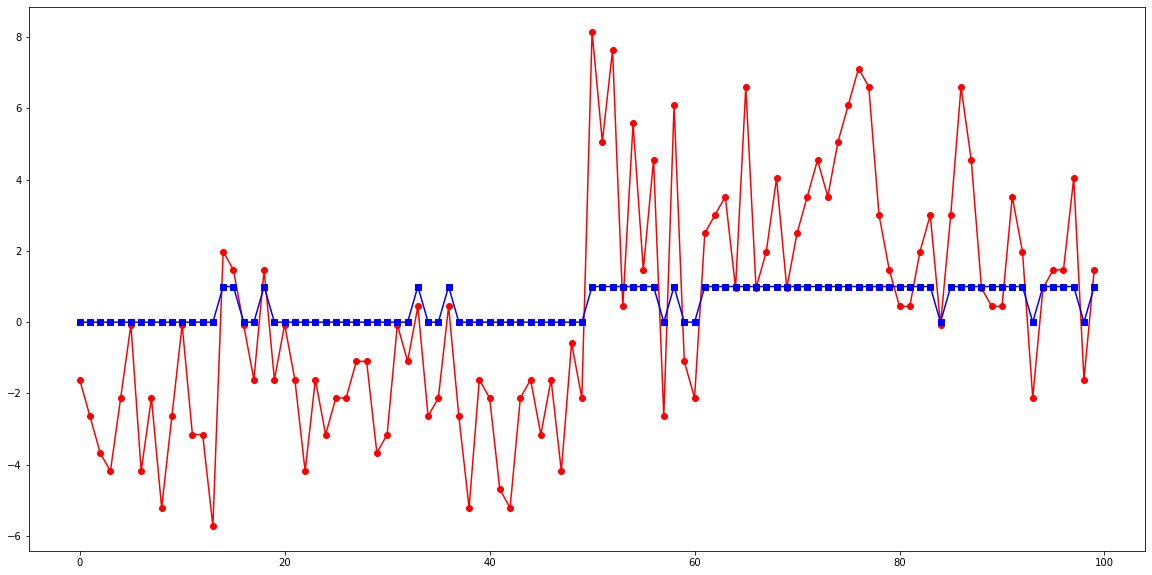

In [26]:
plt.figure(figsize=(20,10))
plt.plot(logit_res.fittedvalues, 'ro-')

plt.plot(y_pred, 'bs-')

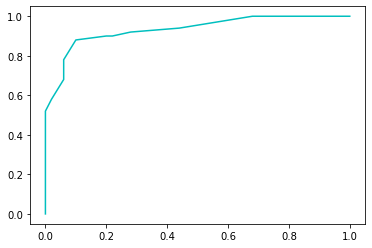

In [28]:
# 실수
# 전형적인 잘못된 케이스
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y, logit_res.fittedvalues)
plt.plot(fpr, tpr, 'c-')
plt.show()

In [29]:
data_med = sm.datasets.get_rdataset('MedGPA', package='Stat2Data')
data_med = data_med.data
data_med.tail()

,Accept,Acceptance,Sex,BCPM,GPA,VR,PS,WS,BS,MCAT,Apps
50,D,0,M,2.41,2.72,8,8,8.0,8,32,7
51,D,0,M,3.51,3.56,11,8,6.0,9,34,6
52,A,1,F,3.43,3.48,7,10,7.0,10,34,14
53,D,0,M,2.61,2.80,7,5,NaN,6,18,6
54,D,0,M,3.36,3.44,11,11,8.0,9,39,1


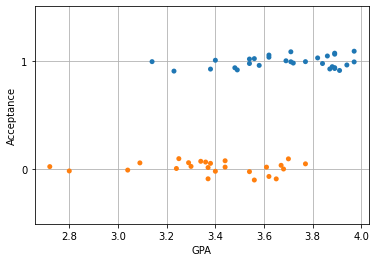

In [32]:
import seaborn as sns
sns.stripplot(x='GPA', y='Acceptance', data=data_med,
            jitter=True, orient='h', order=[1,0])
plt.grid(True)
plt.show()

In [33]:
data_med.columns

Index(['Accept', 'Acceptance', 'Sex', 'BCPM', 'GPA', 'VR', 'PS', 'WS', 'BS',
       'MCAT', 'Apps'],
      dtype='object')

In [37]:
model_med = sm.Logit.from_formula('Acceptance ~ Sex + BCPM + GPA + VR + PS+ WS+ BS+ MCAT+ Apps',data=data_med )
result_med = model_med.fit()

print(result_med.summary())

         Current function value: 0.280736
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:             Acceptance   No. Observations:                   54
Model:                          Logit   Df Residuals:                       45
Method:                           MLE   Df Model:                            8
Date:                Wed, 27 May 2020   Pseudo R-squ.:                  0.5913
Time:                        10:05:11   Log-Likelihood:                -15.160
converged:                      False   LL-Null:                       -37.096
Covariance Type:            nonrobust   LLR p-value:                 6.014e-07
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -46.6414     15.600     -2.990      0.003     -77.216     -16.067
Sex[T.M]      -2.2835      1.429     -1.597      0.110      -5.08

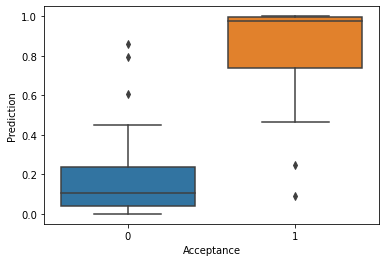

In [43]:
data_med["Prediction"] = result_med.predict(data_med)
sns.boxplot(x="Acceptance", y="Prediction", data=data_med)
plt.show()

In [45]:
model_med = sm.Logit.from_formula("Acceptance ~ PS + BS", data_med)
result_med = model_med.fit()
print(result_med.summary())

Optimization terminated successfully.
         Current function value: 0.460609
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:             Acceptance   No. Observations:                   55
Model:                          Logit   Df Residuals:                       52
Method:                           MLE   Df Model:                            2
Date:                Wed, 27 May 2020   Pseudo R-squ.:                  0.3315
Time:                        10:08:14   Log-Likelihood:                -25.333
converged:                       True   LL-Null:                       -37.896
Covariance Type:            nonrobust   LLR p-value:                 3.503e-06
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -15.5427      4.684     -3.318      0.001     -24.723      -6.362
PS             0.4798      0.

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [51]:
from sklearn.datasets import load_iris

iris = load_iris()

idx = np.in1d(iris.target, [1,2])

X0 = pd.DataFrame(iris.data[idx, :], columns = iris.feature_names)
X = sm.add_constant(X0)
y = iris.target[idx] - 1

logit_mod = sm.Logit(y, X)
logit_res = logit_mod.fit(disp=0)
print(logit_res.summary())

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  100
Model:                          Logit   Df Residuals:                       95
Method:                           MLE   Df Model:                            4
Date:                Wed, 27 May 2020   Pseudo R-squ.:                  0.9142
Time:                        10:14:35   Log-Likelihood:                -5.9493
converged:                       True   LL-Null:                       -69.315
Covariance Type:            nonrobust   LLR p-value:                 1.947e-26
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -42.6378     25.708     -1.659      0.097     -93.024       7.748
sepal length (cm)    -2.4652      2.394     -1.030      0.303      -7.158       2.228
sepal width (cm)     -6.

In [52]:
logit_res.params

-logit_res.params[0]/logit_res.params[1]

y_pred = logit_res.predict(X) >= 0.5

from sklearn.metrics import confusion_matrix

confusion_matrix(y, y_pred)

from sklearn.metrics import classification_report

print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        50
           1       0.98      0.98      0.98        50

    accuracy                           0.98       100
   macro avg       0.98      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100



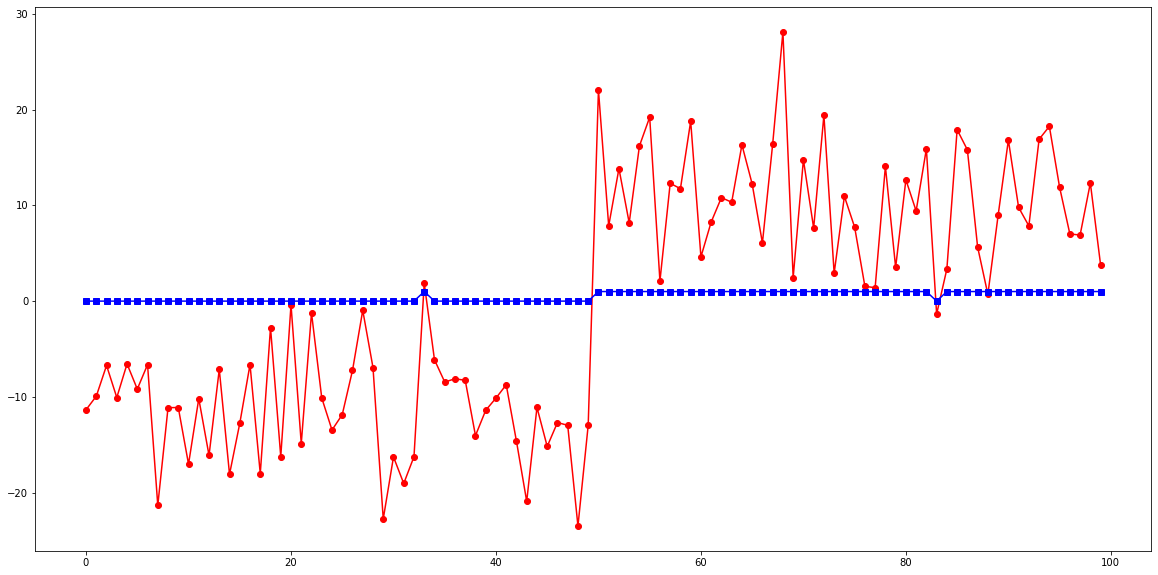

In [53]:
plt.figure(figsize=(20,10))
plt.plot(logit_res.fittedvalues, 'ro-')

plt.plot(y_pred, 'bs-')

In [56]:
data_wrole = sm.datasets.get_rdataset('womensrole', package='HSAUR')
df_wrole = data_wrole.data

In [59]:
data_wrole = sm.datasets.get_rdataset("womensrole", package="HSAUR")
df_wrole = data_wrole.data
df_wrole["ratio"] = df_wrole.agree / (df_wrole.agree + df_wrole.disagree)
df_wrole.tail()

,education,sex,agree,disagree,ratio
37,16,Female,13,115,0.101562
38,17,Female,3,28,0.096774
39,18,Female,0,21,0.000000
40,19,Female,1,2,0.333333
41,20,Female,2,4,0.333333


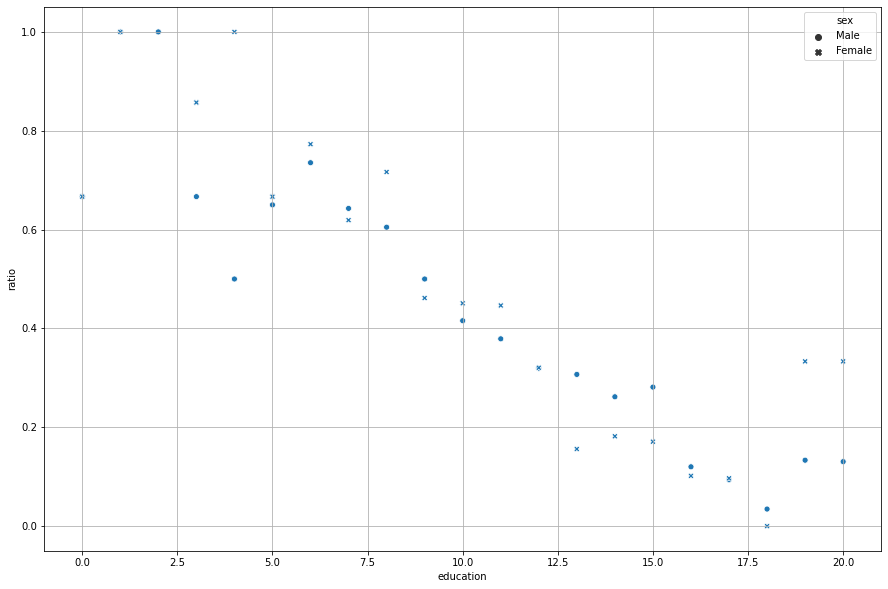

In [66]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='education', y='ratio',style='sex',data=df_wrole)
plt.grid()
plt.show()

In [68]:
model_wrole = sm.Logit.from_formula('ratio ~ education + sex', df_wrole)
result_wrole = model_wrole.fit()

print(result_wrole.summary())

Optimization terminated successfully.
         Current function value: 0.448292
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  ratio   No. Observations:                   41
Model:                          Logit   Df Residuals:                       38
Method:                           MLE   Df Model:                            2
Date:                Wed, 27 May 2020   Pseudo R-squ.:                  0.3435
Time:                        10:36:45   Log-Likelihood:                -18.380
converged:                       True   LL-Null:                       -27.997
Covariance Type:            nonrobust   LLR p-value:                 6.660e-05
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       2.0442      0.889      2.299      0.022       0.302       3.787
sex[T.Male]    -0.1968    

In [69]:
model_wrole2 = sm.Logit.from_formula('ratio ~ education', df_wrole)
result_wrole2 = model_wrole2.fit()

print(result_wrole.summary())

Optimization terminated successfully.
         Current function value: 0.449186
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  ratio   No. Observations:                   41
Model:                          Logit   Df Residuals:                       38
Method:                           MLE   Df Model:                            2
Date:                Wed, 27 May 2020   Pseudo R-squ.:                  0.3435
Time:                        10:38:32   Log-Likelihood:                -18.380
converged:                       True   LL-Null:                       -27.997
Covariance Type:            nonrobust   LLR p-value:                 6.660e-05
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       2.0442      0.889      2.299      0.022       0.302       3.787
sex[T.Male]    -0.1968    

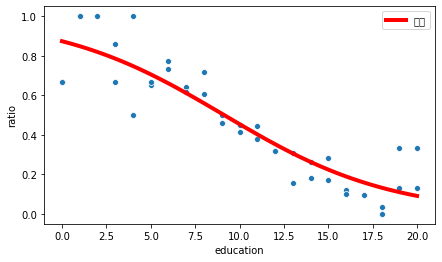

In [74]:
plt.figure(figsize=(7,4))
sns.scatterplot(x='education', y='ratio', data=df_wrole)
xx = np.linspace(0,20,100)
df_wrole_p = pd.DataFrame({'education': xx})
plt.plot(xx, result_wrole2.predict(df_wrole_p), 'r-', lw=4, label='예측')
plt.legend()
plt.show()

In [15]:
uqlOOXXu3JweI/FWiyLC+lGR6nvzOCh8gL2gWAfYzKtbS7j6jtz1SUVwHJGfRn62vWxrPyDfjlcMCmO88ogCvQ==

SyntaxError: invalid syntax (<ipython-input-15-f892751e63b7>, line 1)

In [ ]:
from urllib import request
from urllib.request import urlopen
from urllib.parse import urlencode, quote_plus
url = 'http://apis.data.go.kr/1400000/forestStusService/getfirestatsservice'
queryParams = '?' + urlencode({ quote_plus('ServiceKey') : 'uqlOOXXu3JweI%2FFWiyLC%2BlGR6nvzOCh8gL2gWAfYzKtbS7j6jtz1SUVwHJGfRn62vWxrPyDfjlcMCmO88ogCvQ%3D%3D', quote_plus('ServiceKey') : '', quote_plus('numOfRows') : '10', quote_plus('pageNo') : '1', quote_plus('searchStDt') : '20160101', quote_plus('searchEdDt') : '20160825' })

request = request(url + queryParams)
request.get_method = lambda: 'GET'
response_body = urlopen(request).read()
print(response_body)

In [ ]:
import urllib3
import urllib

In [ ]:
urllib.request()

In [ ]:
from urllib import request
from urllib.request import urlopen
from urllib.parse import urlencode, quote_plus
url = 'http://apis.data.go.kr/1400000/forestStusService'
queryParams = '?' + urlencode({ quote_plus('ServiceKey') : 'uqlOOXXu3JweI/FWiyLC+lGR6nvzOCh8gL2gWAfYzKtbS7j6jtz1SUVwHJGfRn62vWxrPyDfjlcMCmO88ogCvQ==', quote_plus('ServiceKey') : '', quote_plus('numOfRows') : '10', quote_plus('pageNo') : '1', quote_plus('searchStDt') : '20160101', quote_plus('searchEdDt') : '20160825' })

http = urllib3.PoolManager()
aa = http.request('GET', url + queryParams, )

# request.get_method = lambda: 'GET'
# response_body = urlopen(request).read()
# print(response_body)

In [ ]:
from bs4 import BeautifulSoup
# decode_key = unquote('uqlOOXXu3JweI%252FFWiyLC%252BlGR6nvzOCh8gL2gWAfYzKtbS7j6jtz1SUVwHJGfRn62vWxrPyDfjlcMCmO88ogCvQ%253D%253D')
queryParams = urlencode({quote_plus('ServiceKey') : 'uqlOOXXu3JweI/FWiyLC+lGR6nvzOCh8gL2gWAfYzKtbS7j6jtz1SUVwHJGfRn62vWxrPyDfjlcMCmO88ogCvQ==', quote_plus('numOfRows') : '10', quote_plus('pageNo') : '1', quote_plus('searchStDt') : '20160101', quote_plus('searchEdDt') : '20160825' })

open_url='http://apis.data.go.kr/1400000/forestStusService/getfirestatsservice?'+queryParams
res=requests.get(open_url)
soup=BeautifulSoup(res.content,'xml')
soup

In [ ]:
from bs4 import BeautifulSoup
# decode_key = unquote('uqlOOXXu3JweI%252FFWiyLC%252BlGR6nvzOCh8gL2gWAfYzKtbS7j6jtz1SUVwHJGfRn62vWxrPyDfjlcMCmO88ogCvQ%253D%253D')
queryParams = urlencode({quote_plus('ServiceKey') : 'uqlOOXXu3JweI/FWiyLC+lGR6nvzOCh8gL2gWAfYzKtbS7j6jtz1SUVwHJGfRn62vWxrPyDfjlcMCmO88ogCvQ==', quote_plus('numOfRows') : '1000', quote_plus('pageNo') : '1', quote_plus('searchStDt') : '20180101', quote_plus('searchEdDt') : '20200430' })

open_url='http://apis.data.go.kr/1400000/forestStusService/getfirestatsservice?'+queryParams

res=requests.get(open_url)
soup=BeautifulSoup(res.content,'html.parser')

damageareal=[]
enddayl=[]
endmonthl=[]
endtimel=[]
endyearl=[]
firecausel=[]
# locbunjil=[]
# locdongl=[]
locgungul=[]
# locmenul=[]
locsil=[]
startdayl=[]
startmonthl=[]
starttimel=[]
startyearl=[]

data=soup.find_all('item')

for item in data:
    damageareal.append(item.find('damagearea').text)
    enddayl.append(item.find('endday').text)
    endmonthl.append(item.find('endmonth').text)
    endtimel.append(item.find('endtime').text)
    endyearl.append(item.find('endyear').text)
    firecausel.append(item.find('firecause').text)
#     locbunjil.append(item.find('locbunji').text)
#     locdongl.append(item.find('locdong').text)
    locgungul.append(item.find('locgungu').text)
#     locmenul.append(item.find('locmenu').text)
    locsil.append(item.find('locsi').text)
    startdayl.append(item.find('startday').text)
    startmonthl.append(item.find('startmonth').text)
    starttimel.append(item.find('starttime').text)
    startyearl.append(item.find('startyear').text)
forestfire=pd.DataFrame()
forestfire['damagearea']=damageareal
forestfire['endday']=enddayl
forestfire['endmonth']=endmonthl
forestfire['endtime']=endtimel
forestfire['endyear']=endyearl
forestfire['firecause']=firecausel
# forestfire['locbunji']=locbunjil
# forestfire['locdong']=locdongl
forestfire['locgungu']=locgungul
# forestfire['locmenu']=locmenul
forestfire['locsi']=locsil
forestfire['startday']=startdayl
forestfire['startmonth']=startmonthl
forestfire['starttime']=starttimel
forestfire['startyear']=startyearl

forestfire

In [ ]:
from bs4 import BeautifulSoup
queryParams = urlencode({quote_plus('ServiceKey') : 'uqlOOXXu3JweI/FWiyLC+lGR6nvzOCh8gL2gWAfYzKtbS7j6jtz1SUVwHJGfRn62vWxrPyDfjlcMCmO88ogCvQ==', quote_plus('numOfRows') : '1500', quote_plus('pageNo') : '1', quote_plus('searchStDt') : '20180101', quote_plus('searchEdDt') : '20200430' })

open_url='http://apis.data.go.kr/1400000/forestStusService/getfirestatsservice?'+queryParams

res=requests.get(open_url)
soup=BeautifulSoup(res.content,'html.parser')
c
damageareal=[]
enddayl=[]
endmonthl=[]
endtimel=[]
endyearl=[]
firecausel=[]
# locbunjil=[]
# locdongl=[]
locgungul=[]
# locmenul=[]
locsil=[]
startdayl=[]
startmonthl=[]
starttimel=[]
startyearl=[]

data=soup.find_all('item')

for item in data:
    damageareal.append(item.find('damagearea').text)
    enddayl.append(item.find('endday').text)
    endmonthl.append(item.find('endmonth').text)
    endtimel.append(item.find('endtime').text)
    endyearl.append(item.find('endyear').text)
    firecausel.append(item.find('firecause').text)
#     locbunjil.append(item.find('locbunji').text)
#     locdongl.append(item.find('locdong').text)
    locgungul.append(item.find('locgungu').text)
#     locmenul.append(item.find('locmenu').text)
    locsil.append(item.find('locsi').text)
    startdayl.append(item.find('startday').text)
    startmonthl.append(item.find('startmonth').text)
    starttimel.append(item.find('starttime').text)
    startyearl.append(item.find('startyear').text)
    forestfire=pd.DataFrame()
forestfire['damagearea']=damageareal
forestfire['endday']=enddayl
forestfire['endmonth']=endmonthl
forestfire['endtime']=endtimel
forestfire['endyear']=endyearl
forestfire['firecause']=firecausel
# forestfire['locbunji']=locbunjil
# forestfire['locdong']=locdongl
forestfire['locgungu']=locgungul
# forestfire['locmenu']=locmenul
forestfire['locsi']=locsil
forestfire['startday']=startdayl
forestfire['startmonth']=startmonthl
forestfire['starttime']=starttimel
forestfire['startyear']=startyearl
forestfire.sort_values(['startyear','startmonth','startday'],ascending=False)
forestfire.sort_values(['startyear','startmonth','startday'])



In [ ]:
forestfire['damagearea'].value_counts()

In [ ]:
###################################################################

In [ ]:
from urllib import request
from urllib.request import urlopen
from urllib.parse import urlencode, quote_plus
from bs4 import BeautifulSoup
queryParams = urlencode({quote_plus('ServiceKey') : 'uqlOOXXu3JweI%2FFWiyLC%2BlGR6nvzOCh8gL2gWAfYzKtbS7j6jtz1SUVwHJGfRn62vWxrPyDfjlcMCmO88ogCvQ%3D%3D', quote_plus('numOfRows') : '1500', quote_plus('pageNo') : '1', quote_plus('searchStDt') : '20180101', quote_plus('searchEdDt') : '20200430' })

open_url='http://openapi.forest.go.kr/openapi/service/forestDisasterService/frstFireOpenAPI'+queryParams

res=requests.get(open_url)
soup=BeautifulSoup(res.content,'html.parser')

soup

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
ocurjibun=[]
ownersec=[]
ocurcause=[]
dmgarea=[]
dmgmoney=[]
riskavg=[]
riskmax=[]
diravg=[]
tempavg=[]
humidcurr=[]
humidrel=[]
humidmin=[]
windmax=[]
windavg=[]
dirmax=[]
diravg=[]
raindays=[]
rainamount=[]
resultCode=[]
totalCount=[]
resultMsg=[]
ocurdt=[]
ocuryoil=[]
extingdt=[]
exintgtm=[]
ocurGm=[]
ocurdo=[]
ocursgg=[]
ocuremd=[]
ocurri=[]

data=soup.find_all('item')

for item in data:
    diravg.append(item.find('diravg').text)
    ocurjibun.append(item.find('ocurjibun').text)
    ownersec.append(item.find('ownersec').text)
    ocurcause.append(item.find('ocurcause').text)
    dmgarea.append(item.find('dmgarea').text)
    dmgmoney.append(item.find('dmgmoney').text)
    riskavg.append(item.find('riskavg').text)
    riskmax.append(item.find('riskmax').text)
    tempavg.append(item.find('tempavg').text)
    humidcurr.append(item.find('humidcurr').text)
    humidrel.append(item.find('humidrel').text)
    humidmin.append(item.find('humidmin').text)
    windmax.append(item.find('windmax').text)
    windavg.append(item.find('windavg').text)
    dirmax.append(item.find('dirmax').text)
    diravg.append(item.find('diravg').text)
    raindays.append(item.find('raindays').text)
    rainamount.append(item.find('rainamount').text)
    resultCode.append(item.find('resultCode').text)
    totalCount.append(item.find('totalCount').text)
    resultMsg.append(item.find('resultMsg').text)
    ocurdt.append(item.find('ocurdt').text)
    extingdt.append(item.find('extingdt').text)
    exintgtm.append(item.find('exintgtm').text)
    ocurGm.append(item.find('ocurGm').text)
    ocurdo.append(item.find('ocurdo').text)
    ocursgg.append(item.find('ocursgg').text)
    ocuremd.append(item.find('ocuremd').text)
    ocurri.append(item.find('ocurri').text)
    
forestfire=pd.DataFrame()


forestfire['diravg']=diravg
forestfire['dirmax']=dirmax
forestfire['dmgarea']=dmgarea
forestfire['dmgmoney']=dmgmoney
forestfire['exintgtm']=exintgtm
forestfire['extingdt']=extingdt
forestfire['humidcurr']=humidcurr
forestfire['humidmin']=humidmin
forestfire['humidrel']=humidrel
# forestfire['numOfRows']=numOfRows
forestfire['ocurcause']=ocurcause
forestfire['ocurdo']=ocurdo
forestfire['ocurdt']=ocurdt
forestfire['ocuremd']=ocuremd
forestfire['ocurGm']=ocurGm
forestfire['ocurjibun']=ocurjibun
forestfire['ocurri']=ocurri
forestfire['ocursgg']=ocursgg
forestfire['ocuryoil']=ocuryoil
forestfire['ownersec']=ownersec
# forestfire['pageNo']=pageNol
forestfire['rainamount']=rainamount
forestfire['raindays']=raindays
forestfire['resultCode']=resultCode
forestfire['resultMsg']=resultMsg
forestfire['riskavg']=riskavg
forestfire['riskmax']=riskmax
forestfire['tempavg']=tempavg
forestfire['totalCount']=totalCount
forestfire['windavg']=windavg
forestfire['windmax']=windmax

# forestfire.sort_values(['startyear','startmonth','startday'],ascending=False)
# forestfire.sort_values(['startyear','startmonth','startday'])
forestfire